In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn import model_selection
from sklearn import datasets
import random

# prepare your data

## 3.1 Download data

In [363]:
raw_data = pd.read_csv('london-borough-profiles-jan2018.csv')
raw_data.dropna(how = 'any',axis = 0,inplace=True)
raw_data['Male life expectancy, (2012-14)'] = raw_data['Male life expectancy, (2012-14)'].astype('float')
raw_data['Female life expectancy, (2012-14)'] = raw_data['Female life expectancy, (2012-14)'].astype('float')

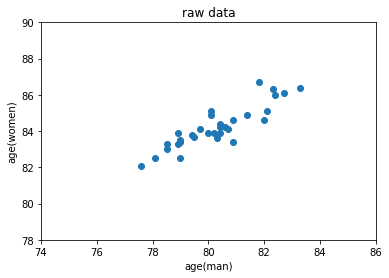

In [364]:
plt.scatter(raw_data['Male life expectancy, (2012-14)'],raw_data['Female life expectancy, (2012-14)'])

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白

plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

## 3.2 Partition the data

In [365]:
# partition the data
x_train, x_test ,y_train, y_test = model_selection.train_test_split(raw_data['Male life expectancy, (2012-14)'],
                                                            raw_data['Female life expectancy, (2012-14)'],
                                                           test_size=0.10)


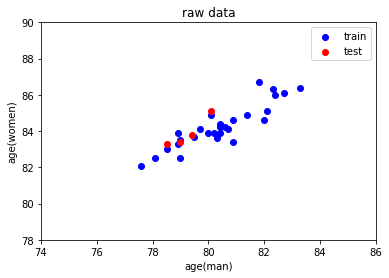

In [366]:
fig = plt.figure()
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,y_test,color = 'red')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

## 3.3 Generate a synthetic dataset

Randomly generate a synthetic dataset of 100 data points (x; y), where the target variables,<br>
y, are drawn from a linear model y = p x + q with some randomly selected p and pre-defined<br>
noise factor q. We do that using the scikit-learn function datasets .make_regression (),

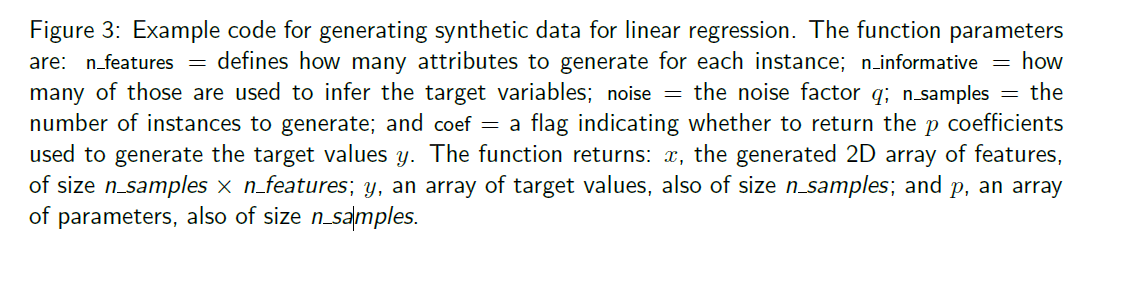

In [367]:
x,y,p = datasets.make_regression(n_samples=100,n_features=1,n_informative=1,noise=10,coef=True)

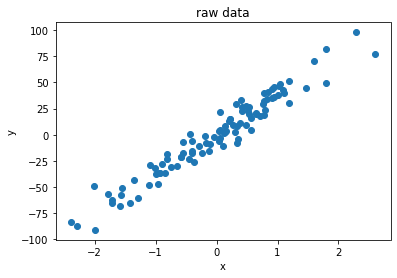

In [368]:
plt.scatter(x,y)

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [369]:
# partition the data
generate_x_train, generate_x_test ,generate_y_train, generate_y_test = model_selection.train_test_split(x,
                                                            y,
                                                           test_size=0.10)

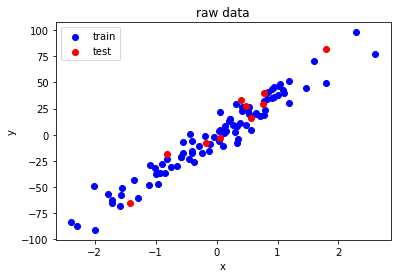

In [370]:
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')
plt.scatter(generate_x_test,generate_y_test,color = 'red')

plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#  Linear Regression

## 4.1 Solving Linear Regression with Gradient Descent

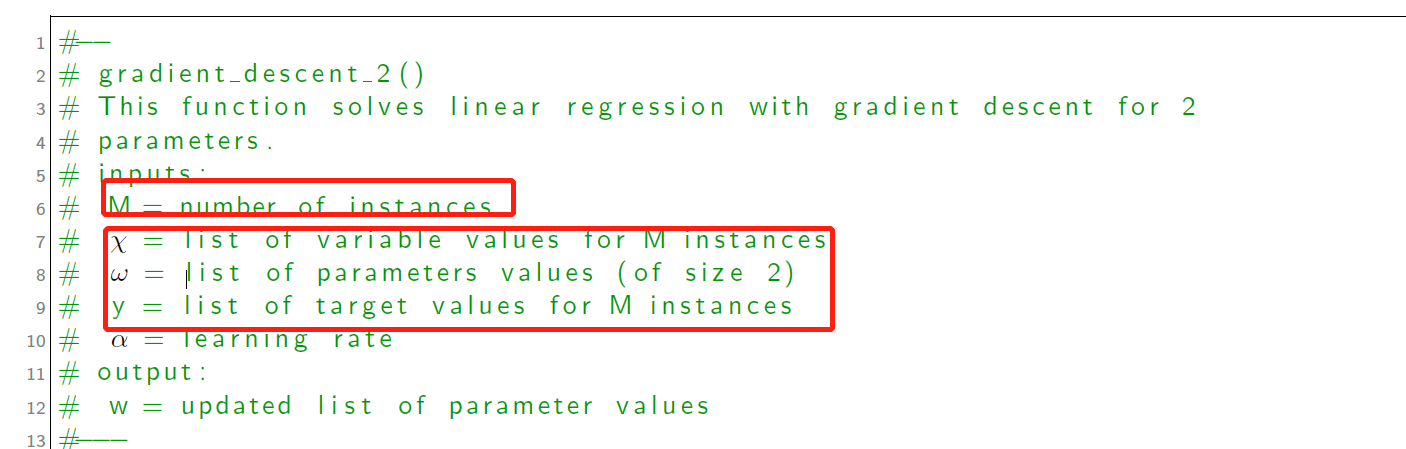

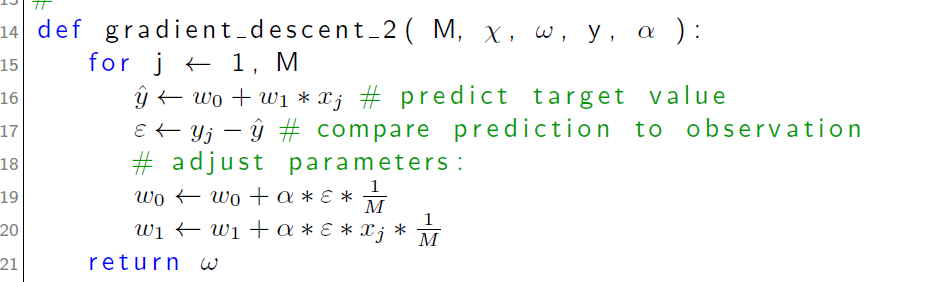

In [371]:
def deal_with_format(x):
    x = np.array(x)
    if len(x.shape)==1:
        return x.reshape(1,len(x))
    else:
        return x

In [372]:
def gradient_descent_2(M,x,w,y,alpha):
    x = deal_with_format(x)
    pending = deal_with_format([1 for i in range (x.shape[1])])
    x = np.r_[pending,x]
    w = deal_with_format(w).transpose()
    y = deal_with_format(y).transpose()
    y_pred = np.matmul(w.transpose(),x).transpose()
    w =w +  alpha/M* np.matmul(x,(y - y_pred))
    return w
    

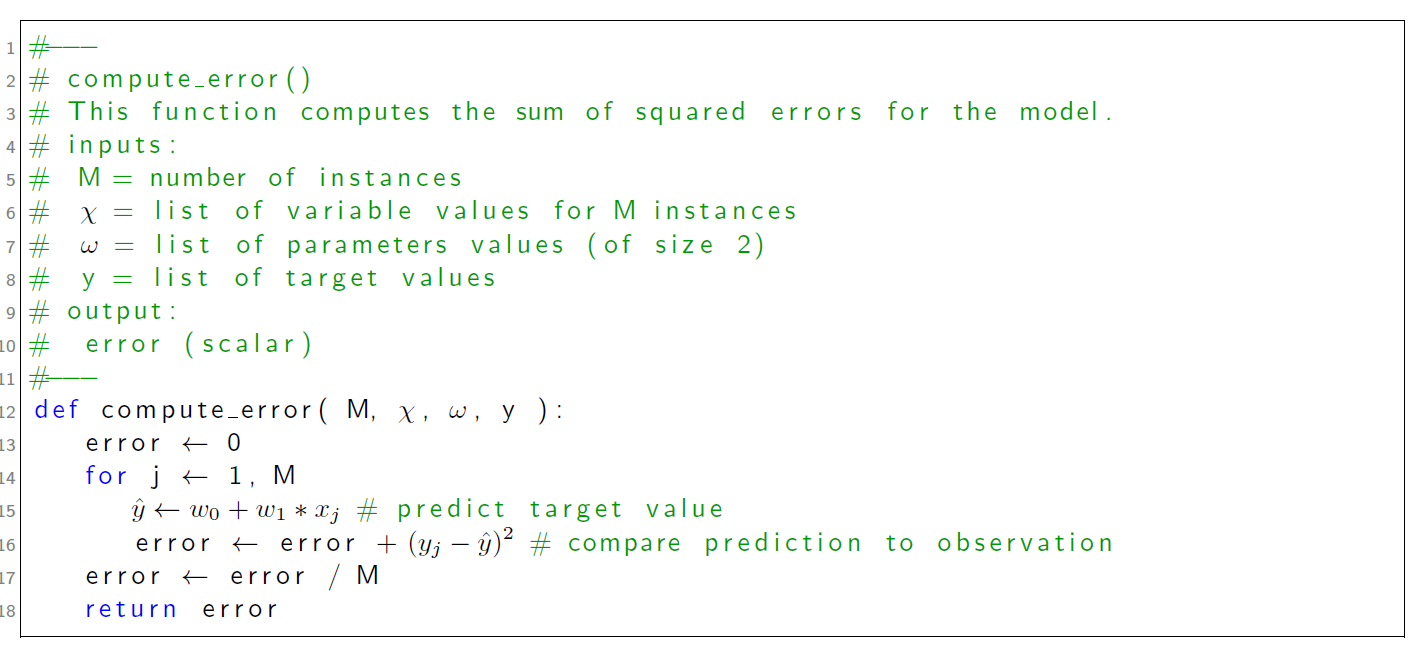

In [373]:
def compute_error(M,x,w,y):
    # x多加一个1
    # feature带上w0
    
    x = deal_with_format(x)
    pending = deal_with_format([1 for i in range (x.shape[1])])
    x = np.r_[pending,x]
    w = deal_with_format(w).transpose()
    y = deal_with_format(y).transpose()
#     print(w)
    y_pred = np.matmul(w.transpose(),x).transpose()
    
    error = np.sum((y_pred - y)**2)
    error = error/M
    return error


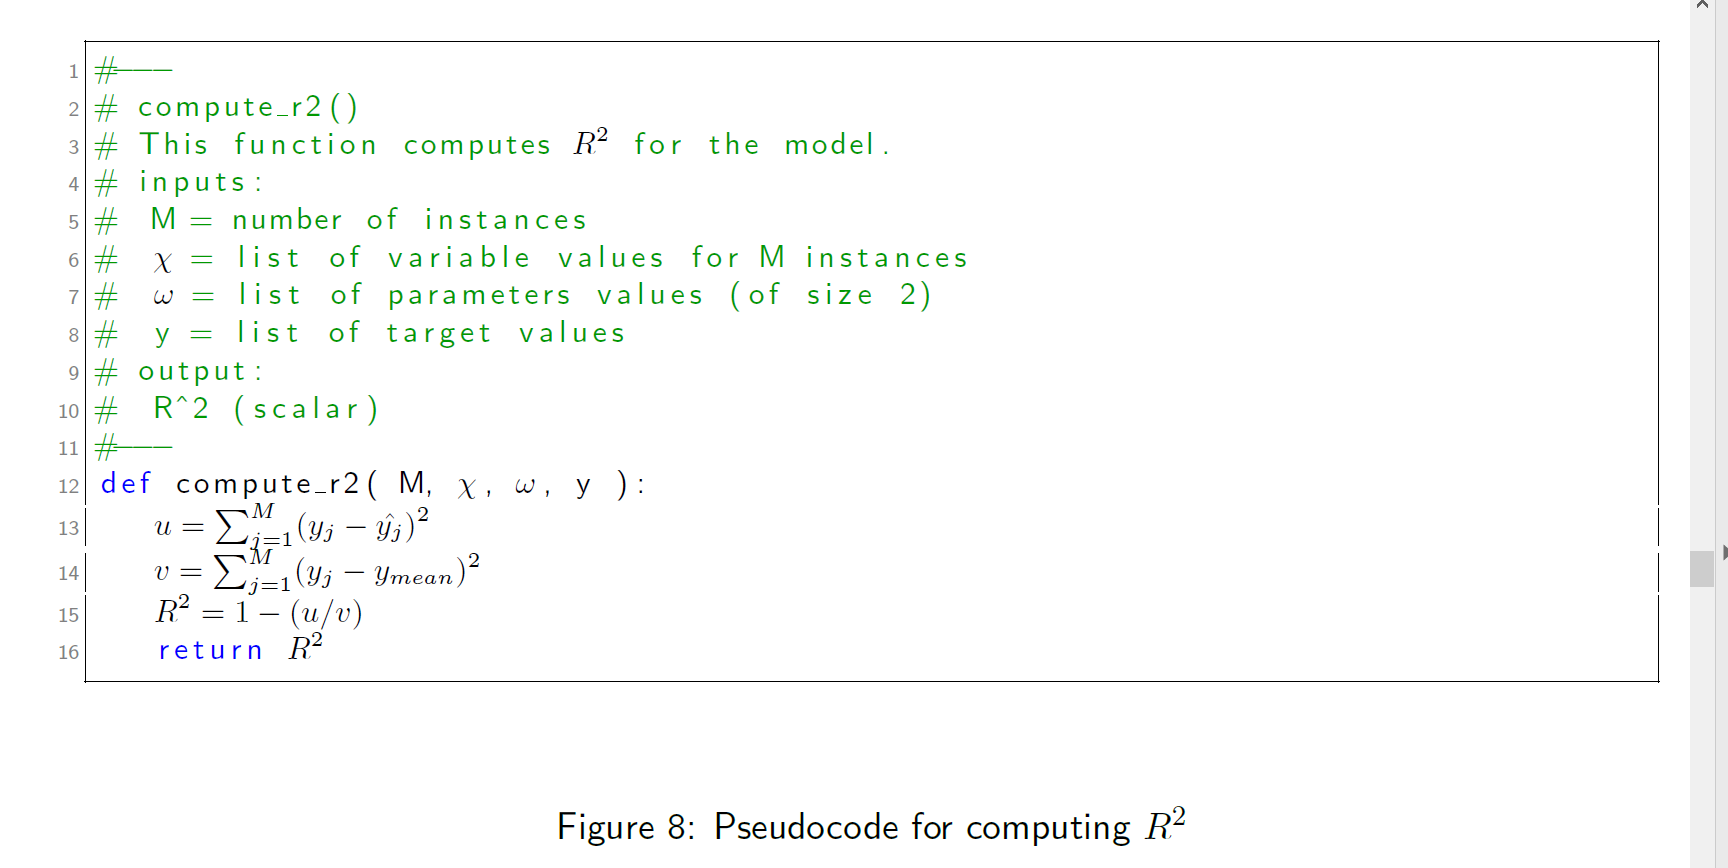

In [374]:
def compute_r2(M,x,w,y):
    x = deal_with_format(x)
    pending = deal_with_format([1 for i in range (x.shape[1])])
    x = np.r_[pending,x]
    w = deal_with_format(w).transpose()
    y = deal_with_format(y).transpose()
    y_pred = np.matmul(w.transpose(),x).transpose()
    u = np.matmul((y - y_pred).transpose(),y - y_pred)
    u =u[0][0]
    
    y_mean = np.mean(y)
    v = np.matmul((y - y_mean).transpose(),y-y_mean)
    v = v[0][0]
    
    R_square = 1 - (u/v)
    return R_square
    

In [375]:
x_train_list = list(x_train)
y_train_list = list(y_train)
M = len(y_train_list)
alpha = 0.0001

w =[0,0]
for i in range(100):
    w_matrix = gradient_descent_2(M,x_train_list,w,y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    print('error')
    print(compute_error(M,x_train_list,w,y_train_list))
#     print('new_w')
#     print(gradient_descent_2(M,generate_x_test,w,generate_y_test_list,alpha))
print(w)

error
884.479082873385
error
110.47703757396854
error
14.158766081887416
error
2.172739059329012
error
0.6811752837087227
error
0.4955622690827449
error
0.47246422544772537
error
0.46958985071740483
error
0.46923214741417196
error
0.46918762344065323
error
0.4691820720924473
error
0.4691813705710934
error
0.46918127257132675
error
0.4691812496749209
error
0.4691812361245228
error
0.46918122373715543
error
0.4691812114945204
error
0.4691811992699009
error
0.46918118704751854
error
0.4691811748254181
error
0.469181162603354
error
0.4691811503812919
error
0.4691811381592316
error
0.46918112593717537
error
0.46918111371511745
error
0.46918110149305875
error
0.46918108927100227
error
0.4691810770489477
error
0.4691810648268947
error
0.4691810526048397
error
0.46918104038278496
error
0.46918102816073254
error
0.4691810159386835
error
0.4691810037166319
error
0.46918099149458303
error
0.46918097927253244
error
0.469180967050482
error
0.4691809548284355
error
0.46918094260639
error
0.469180930

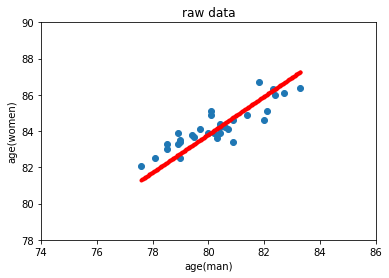

In [376]:
plt.scatter(raw_data['Male life expectancy, (2012-14)'],raw_data['Female life expectancy, (2012-14)'])

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白

plt.plot(np.linspace(min(x_train), max(x_train), 200), w[1] * np.linspace(min(x_train), max(x_train), 200) + w[0], c= "red", marker='.', linestyle=':')


plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

###  step by step plot

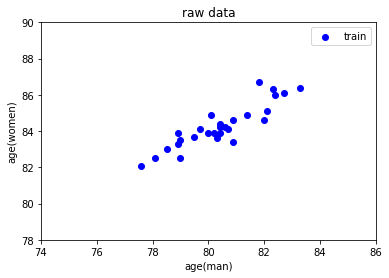

error
7104.266428571428
r square
-5114.301495169168
w
[0, 0]


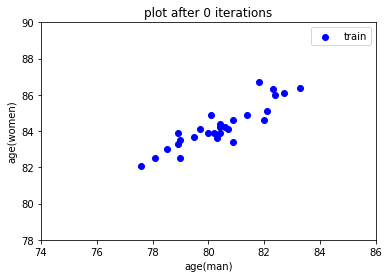

error
884.479082873385
r square
-635.8535330927716
w
[0.008427857142857145, 0.6780212857142858]


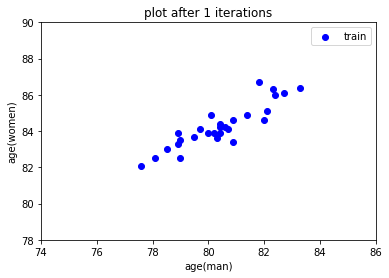

error
110.47703757396854
r square
-78.54703855294743
w
[0.011401401008724492, 0.917202244669546]


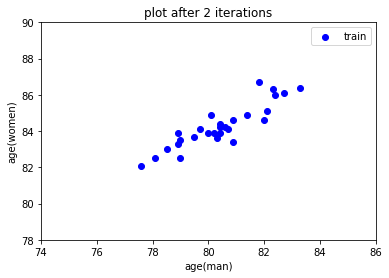

error
14.158766081887416
r square
-9.194769303295
w
[0.01245086381426546, 1.0015764812497603]


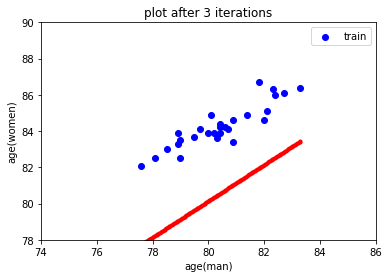

error
2.172739059329012
r square
-0.5644423629862467
w
[0.012821581608517658, 1.0313406015047626]


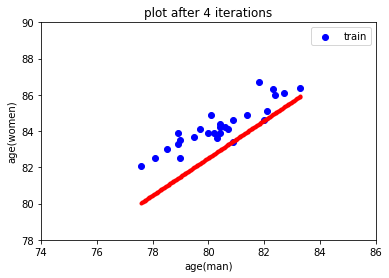

error
0.6811752837087227
r square
0.50953177470736
w
[0.012952863133753678, 1.0418402818226662]


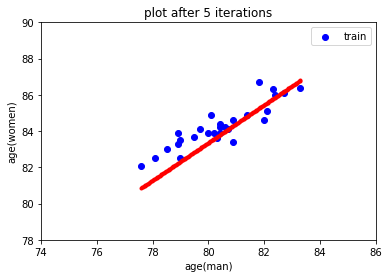

error
0.4955622690827449
r square
0.6431791457322731
w
[0.012999680352108781, 1.0455441764681863]


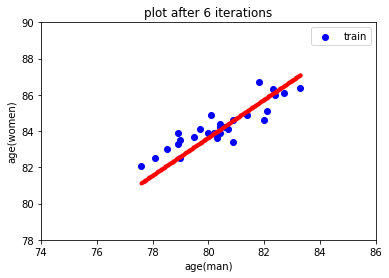

error
0.47246422544772537
r square
0.6598104838626275
w
[0.013016701670416419, 1.0468507679449788]


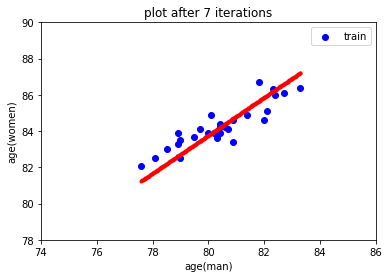

error
0.46958985071740483
r square
0.6618801265911933
w
[0.013023212091360495, 1.0473116790604635]


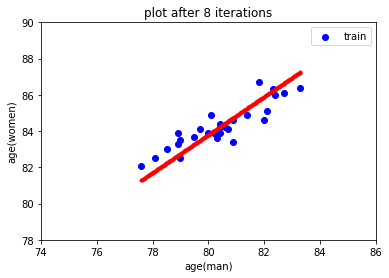

error
0.46923214741417196
r square
0.6621376845333469
w
[0.013026014654393967, 1.0474742652570017]


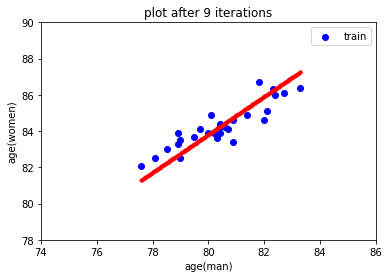

error
0.46918018484098306
r square
0.6621750992658879
w
[0.013099029701926225, 1.0475619910334246]


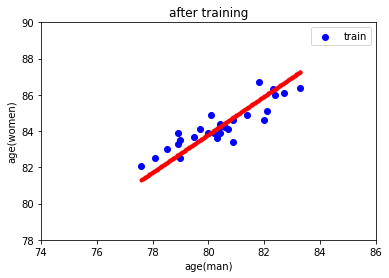

error
0.8160334065859179
r square
-0.5845308865746102
w
[0.013099029701926225, 1.0475619910334246]


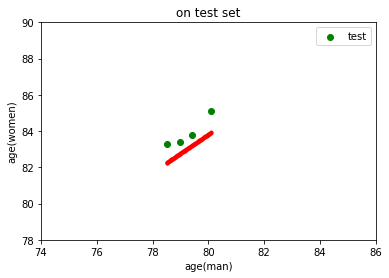

[0.013099029701926225, 1.0475619910334246]


In [377]:
x_train_list = list(x_train)
y_train_list = list(y_train)

x_test_list = list(x_test)
y_test_list = list(y_test)

M = len(y_train_list)
alpha = 0.0001

#################################################### before training ####################################################################
w =[0,0]
fig = plt.figure()
plt.scatter(x_train,y_train,color='blue')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['train'])

plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

########################################################## start training #############################################################
for i in range(101):
#     print('error')
#     print(compute_error(M,x_train_list,w,y_train_list))
    if i < 10:
        print('error')
        print(compute_error(M,x_train_list,w,y_train_list))
        print('r square')
        print(compute_r2(M,x_train_list,w,y_train_list))
        print('w')
        print(w)
        
        fig = plt.figure()
        plt.scatter(x_train,y_train,color='blue')

        x_major_locator=MultipleLocator(2)
        #把x轴的刻度间隔设置为2，并存在变量里
        y_major_locator=MultipleLocator(2)
        #把y轴的刻度间隔设置为2，并存在变量里
        ax=plt.gca()
        # #ax为两条坐标轴的实例

        ax.xaxis.set_major_locator(x_major_locator)
        # #把x轴的主刻度设置为1的倍数
        ax.yaxis.set_major_locator(y_major_locator)
        #把y轴的主刻度设置为10的倍数
        plt.xlim(74,86)
        #把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
        plt.ylim(78,90)
        #把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
        plt.legend(['train'])
        
        plt.plot(np.linspace(min(x_train), max(x_train), 200), w[1] * np.linspace(min(x_train), max(x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
        
        plt.title('plot after {} iterations'.format(i))
        plt.xlabel('age(man)')
        plt.ylabel('age(women)')
        plt.show()
    
    # update w
    w_matrix = gradient_descent_2(M,x_train_list,w,y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    
       
########################################################### after training #############################################################
print('error')
print(compute_error(M,x_train_list,w,y_train_list))
print('r square')
print(compute_r2(M,x_train_list,w,y_train_list))
print('w')
print(w)

fig = plt.figure()
plt.scatter(x_train,y_train,color='blue')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['train'])

plt.plot(np.linspace(min(x_train), max(x_train), 200), w[1] * np.linspace(min(x_train), max(x_train), 200) + w[0], c= "red", marker='.', linestyle=':')

plt.title('after training')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()


############################################################# test results #########################################################3
M = len(y_test_list)
print('error')
print(compute_error(M,x_test_list,w,y_test_list))
print('r square')
print(compute_r2(M,x_test_list,w,y_test_list))
print('w')
print(w)

fig = plt.figure()
plt.scatter(x_test,y_test,color='green')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['test'])

plt.plot(np.linspace(min(x_test), max(x_test), 100), w[1] * np.linspace(min(x_test), max(x_test), 100) + w[0], c= "red", marker='.', linestyle=':')

plt.title('on test set')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()




print(w)

### R square

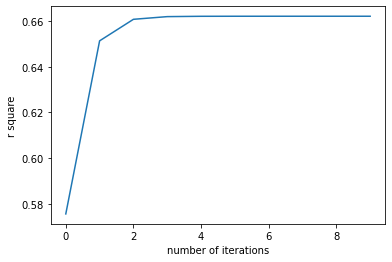

In [378]:
x_train_list = list(x_train)
y_train_list = list(y_train)
M = len(y_train_list)
alpha = 0.0001
r2 = []
w =[0.013001356752405248, 1.0432514047068266]
for i in range(10):
    r2.append(compute_r2(M,x_train_list,w,y_train_list))    
    
    # update w
    w_matrix = gradient_descent_2(M,x_train_list,w,y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
fig = plt.figure()
plt.xlabel('number of iterations')
plt.ylabel('r square')
plt.plot(r2)
plt.show()

### synthetic data

In [379]:
# x,y,p = datasets.make_regression(n_samples=200,n_features=1,n_informative=1,noise=1300,coef=True)
# # partition the data
# generate_x_train, generate_x_test ,generate_y_train, generate_y_test = model_selection.train_test_split(x,
#                                                             y,
#                                                            test_size=0.12)

In [380]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()
M = len(generate_y_test_list)
alpha = 0.5

w =[0,0]
for i in range(300):
    w_matrix = gradient_descent_2(M,generate_x_test_list,w,generate_y_test_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    print('error')
    print(compute_error(M,generate_x_test_list,w,generate_y_test_list))
#     print('new_w')
#     print(gradient_descent_2(M,generate_x_test,w,generate_y_test_list,alpha))
print(w)

error
561.5885873370271
error
261.66617208891313
error
152.214556285517
error
106.11660998612983
error
85.27376752729042
error
75.56291326452667
error
70.9848334067743
error
68.81678803962987
error
67.78831293051566
error
67.30011285159785
error
67.06831650001854
error
66.95825012653758
error
66.90598434169985
error
66.88116525279345
error
66.869379528627
error
66.86378288709486
error
66.86112522965047
error
66.85986319690463
error
66.85926389965275
error
66.85897931336909
error
66.85884417282968
error
66.85877999909204
error
66.85874952512306
error
66.85873505405091
error
66.8587281822211
error
66.85872491901817
error
66.85872336943189
error
66.85872263358499
error
66.85872228415583
error
66.85872211822354
error
66.85872203942783
error
66.85872200201041
error
66.85872198424208
error
66.85872197580453
error
66.85872197179782
error
66.85872196989513
error
66.85872196899163
error
66.8587219685626
error
66.85872196835885
error
66.85872196826212
error
66.85872196821614
error
66.85872196819

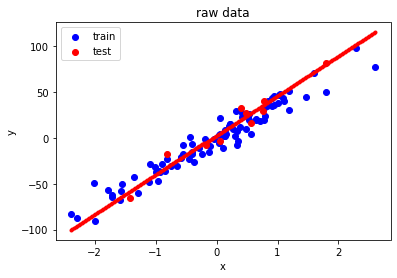

In [381]:
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')
plt.scatter(generate_x_test,generate_y_test,color = 'red')

plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
plt.show()

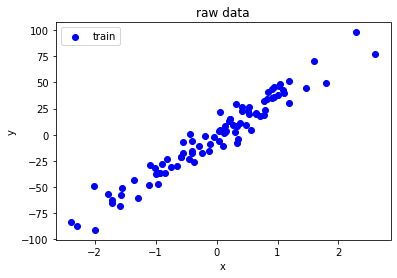

error
1412.0379891540224
r_square
-0.00179493470258274
w
[0, 0]


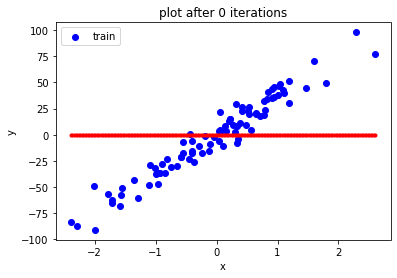

error
408.54748172549756
r_square
0.7101488763603967
w
[-0.7952947328578002, 18.30631055703864]


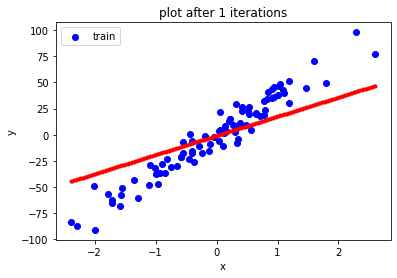

error
162.65285880641292
r_square
0.8846030975662474
w
[-0.8348106502701704, 27.372054660599375]


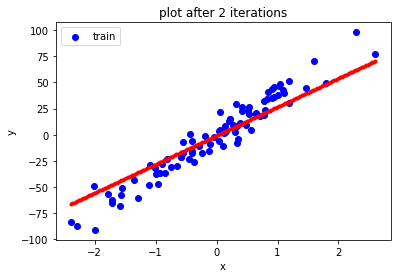

error
102.0256490443836
r_square
0.9276161270394417
w
[-0.677212933614838, 31.86857044057953]


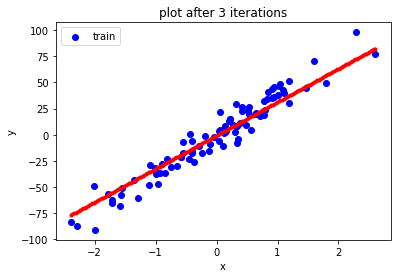

error
86.98409287762026
r_square
0.9382876209324182
w
[-0.5104474854714637, 34.10226255214354]


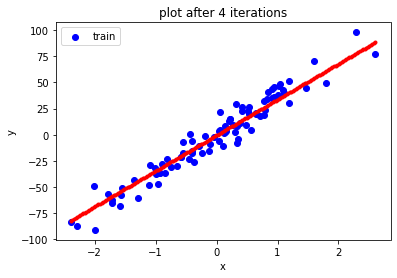

error
83.22904964619295
r_square
0.9409517017275014
w
[-0.3833664208696782, 35.213603804540625]


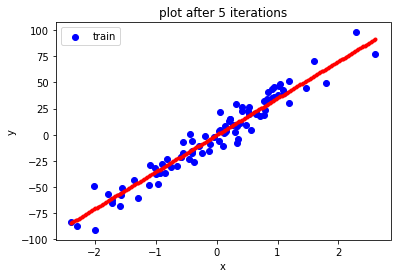

error
82.28587654892787
r_square
0.9416208523018099
w
[-0.2980844103046261, 35.76739851829965]


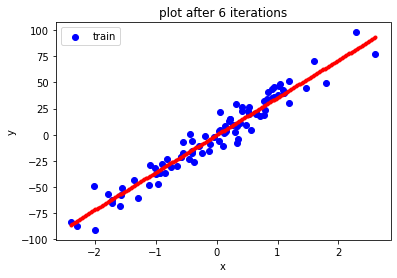

error
82.04756312892587
r_square
0.9417899279066191
w
[-0.24460936488723756, 36.043790616540996]


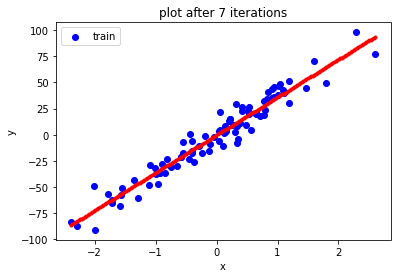

error
81.98700324328294
r_square
0.9418328931718238
w
[-0.21246470662648936, 36.18194796883478]


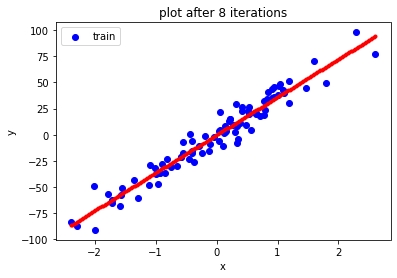

error
81.97153016045357
r_square
0.9418438708198204
w
[-0.19368956675688465, 36.251113229751866]


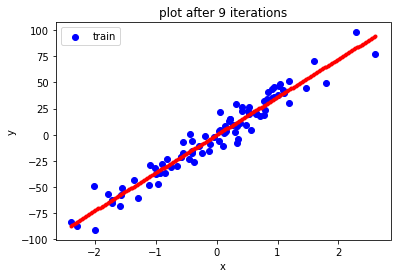

error
81.96617197958405
r_square
0.9418476722745232
w
[-0.16947889258070764, 36.32086983583755]


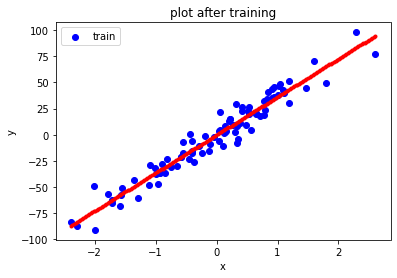

error
121.7998012768187
r_square
0.9135033316957399
w
[-0.16947889258070764, 36.32086983583755]


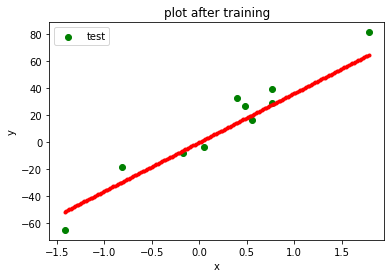

In [382]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()

generate_x_train_list = generate_x_train.transpose()
generate_y_train_list = generate_y_train.tolist()

M = len(generate_y_train_list)
alpha = 0.5

w =[0,0]

################################################# before training #######################################################
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')

plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


############################################################ start training ###################################################################
for i in range(5000):
    if i <10:
        print('error')
        print(compute_error(M,generate_x_train_list,w,generate_y_train_list))
        print('r_square')
        print(compute_r2(M,generate_x_train_list,w,generate_y_train_list))
        print('w')
        print(w)
        fig = plt.figure()
        plt.scatter(generate_x_train,generate_y_train,color='blue')

        plt.legend(['train'])

        plt.title('plot after {} iterations'.format(i))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
        plt.show()
    
    # update w
    w_matrix = gradient_descent_2(M,generate_x_train_list,w,generate_y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    
    
################################################## after training ######################################################################
print('error')
print(compute_error(M,generate_x_train_list,w,generate_y_train_list))
print('r_square')
print(compute_r2(M,generate_x_train_list,w,generate_y_train_list))
print('w')
print(w)
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')

plt.legend(['train'])

plt.title('plot after training')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
plt.show()

############################################################# test results #########################################################3
M = len(generate_y_test_list)
print('error')
print(compute_error(M,generate_x_test_list,w,generate_y_test_list))
print('r_square')
print(compute_r2(M,generate_x_test_list,w,generate_y_test_list))
print('w')
print(w)
fig = plt.figure()
plt.scatter(generate_x_test,generate_y_test,color='green')

plt.legend(['test'])

plt.title('plot after training')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_test), max(generate_x_test), 200), w[1] * np.linspace(min(generate_x_test), max(generate_x_test), 200) + w[0], c= "red", marker='.', linestyle=':')
plt.show()


# print(w)

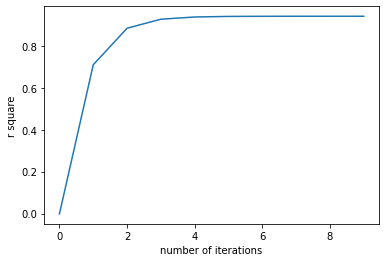

In [383]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()

generate_x_train_list = generate_x_train.transpose()
generate_y_train_list = generate_y_train.tolist()

M = len(generate_y_train_list)
alpha = 0.5

w =[0,0]
r2 = []
for i in range(10):
    
    r2.append(compute_r2(M,generate_x_train_list,w,generate_y_train_list))
    
    # update w
    w_matrix = gradient_descent_2(M,generate_x_train_list,w,generate_y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]

fig = plt.figure()
plt.xlabel('number of iterations')
plt.ylabel('r square')
plt.plot(r2)
plt.show()

### 4.1.1 Choosing a Learning Rate

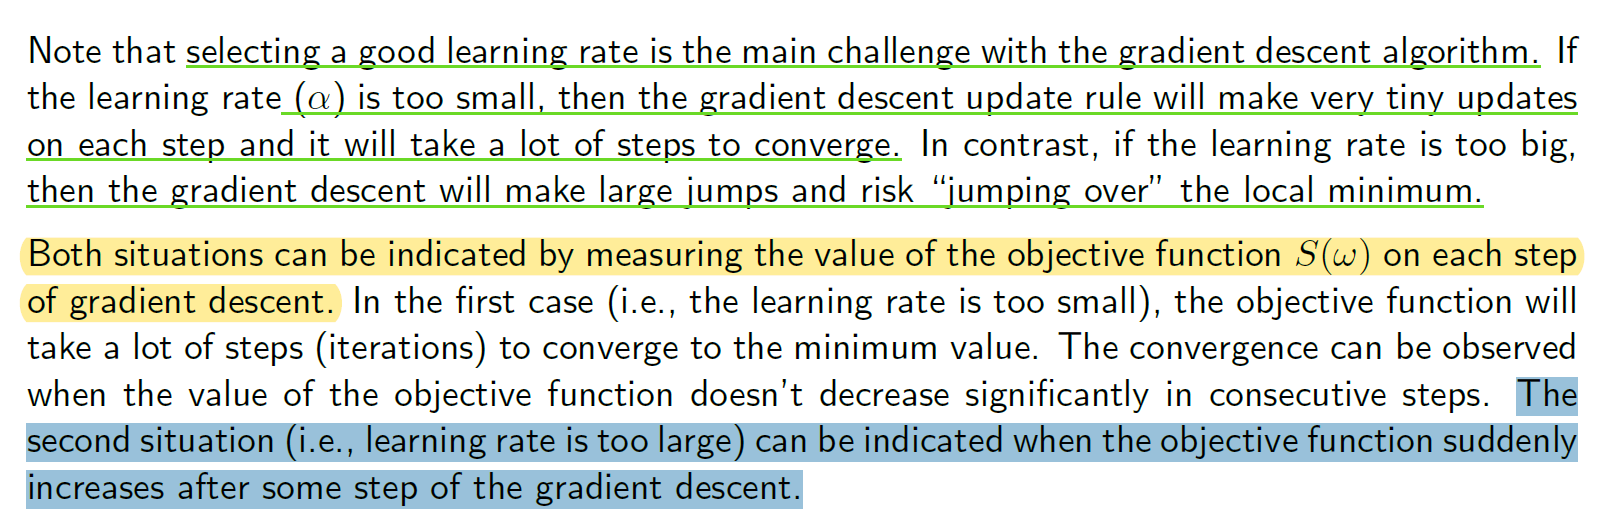

### 4.1.2 Knowing when to stop iterating

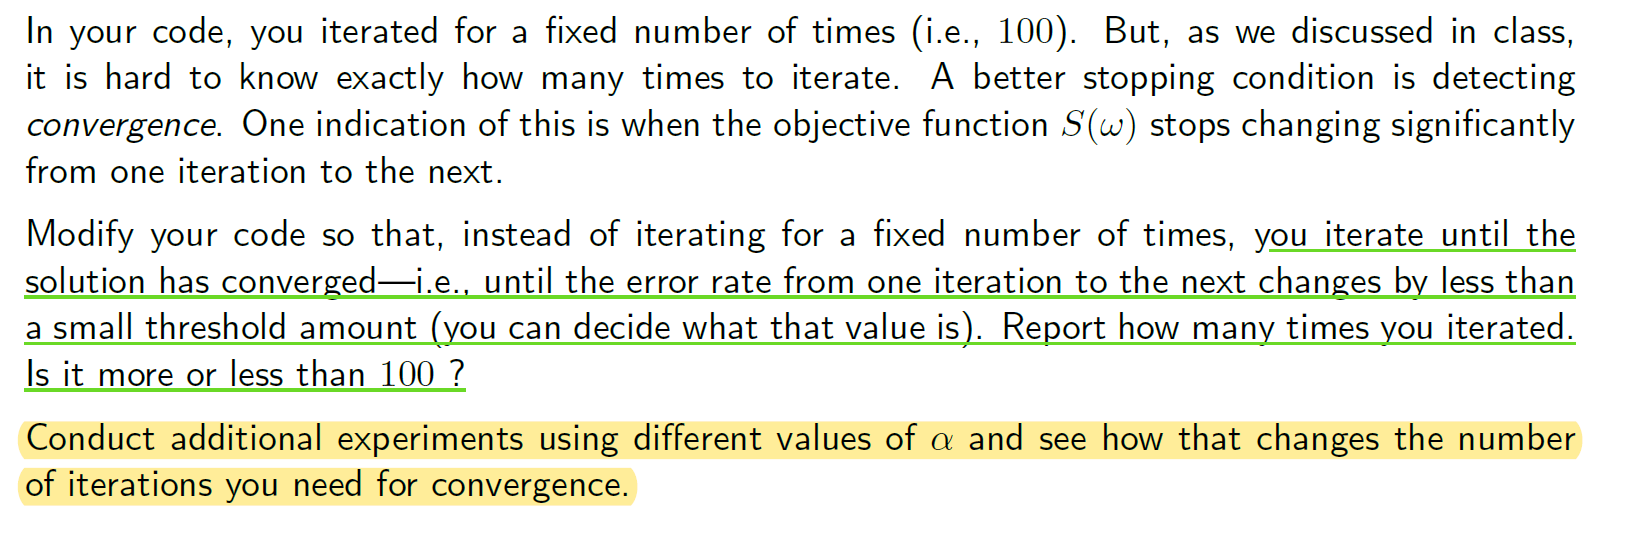

learning rate大了直接就不converge了<br>
learning rate小多循环几次还能得到正确的结果

In [384]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()
M = len(generate_y_test_list)
alpha = 0.5
sigma = 0.0000000000000000001
number_of_iteration = 0
w =[0,0]
error_intial = 0
while True:
    error_now = compute_error(M,generate_x_test_list,w,generate_y_test_list)
    if abs(error_now - error_intial)<sigma:
        break
    else:
        w_matrix = gradient_descent_2(M,generate_x_test_list,w,generate_y_test_list,alpha)
        w = [w_matrix[0][0],w_matrix[1][0]]
        error_intial = error_now
        number_of_iteration = number_of_iteration+1
print(number_of_iteration)

58


## 4.2 Using the Linear Regression package in scikit-learn

对于scikit而言<br>
因变量输入的形式是：一列输入，y是一个(28,1)或者(28,)
<br>自变量输入的形式是：每一个record占一行，一共有28个数据，就是28行，自变量这个矩阵不在最前面加1
<br>总而言之，就是一条记录一行

In [385]:
from sklearn import linear_model
from sklearn import metrics

# initialise model
lr = linear_model.LinearRegression()

# builld model by fitting parameters to the training data
x_train_test = np.array(x_train).reshape(1,-1).transpose()
y_train_test = np.array(y_train)
lr.fit(x_train_test,y_train_test)

# output the regression equation
print('scikit regression equation y =')
print(lr.intercept_,'+',lr.coef_[0],'x')

# measure how good the predictions are with the training data and output scores
print()
print('measure how good the predictions are with the training data and output scores')
y_hat = lr.predict(np.array(x_train).reshape(1,-1).transpose())
print('r2 = ')
print(metrics.r2_score(y_train_test,y_hat))
print('mean square error=')
print(metrics.mean_squared_error(np.array(y_train).reshape(1,-1).transpose(),y_hat))

print()
print('measure how good the predictions are with the training data and output scores')
# measure how good the predictions are with the training data and output scores
y_hat = lr.predict(np.array(x_test).reshape(1,-1).transpose())
print('r2 = ')
print(metrics.r2_score(np.array(y_test),y_hat))
print('mean square error = ')
print(metrics.mean_squared_error(np.array(y_test).reshape(1,-1).transpose(),y_hat))


scikit regression equation y =
24.8302364431542 + 0.7391116644872264 x

measure how good the predictions are with the training data and output scores
r2 = 
0.8018741130549573
mean square error=
0.27516248819035766

measure how good the predictions are with the training data and output scores
r2 = 
0.2943839033419975
mean square error = 
0.36339228977886856


In [386]:
Ir2 = linear_model.LinearRegression()
# builld model by fitting parameters to the training data

Ir2.fit(generate_x_train,generate_y_train)
w_sklearn = []
w_sklearn.append( Ir2.intercept_)
w_sklearn.append( Ir2.coef_[0])

y_hat2 = Ir2.predict(generate_x_train)


r2 = metrics.r2_score(generate_y_train,y_hat2)
error = metrics.mean_squared_error(generate_y_train,y_hat2)

error
81.96617197958405
r_square
0.9418476722745232
w
[-0.16947889258070736, 36.320869835837556]


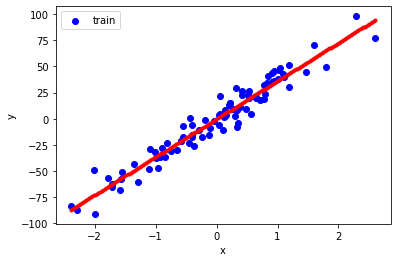

In [387]:
print('error')
print(error)
print('r_square')
print(r2)
print('w')
print(w_sklearn)
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')

plt.legend(['train'])

plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w_sklearn[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w_sklearn[0], c= "red", marker='.', linestyle=':')
plt.show()

In [388]:
y2_hat = Ir2.predict(generate_x_test)
r2_test = metrics.r2_score(generate_y_test,y2_hat)
error2 = metrics.mean_squared_error(generate_y_test,y2_hat)

error
121.79980127681861
r_square
0.9135033316957399
w
[-0.16947889258070736, 36.320869835837556]


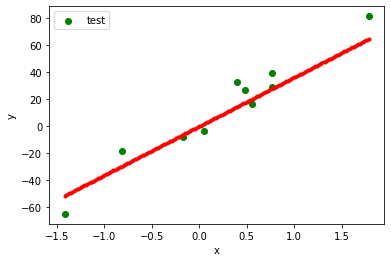

In [389]:
print('error')
print(error2)
print('r_square')
print(r2_test)
print('w')
print(w_sklearn)
fig = plt.figure()
plt.scatter(generate_x_test,generate_y_test,color='green')

plt.legend(['test'])

plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_test), max(generate_x_test), 200), w_sklearn[1] * np.linspace(min(generate_x_test), max(generate_x_test), 200) + w_sklearn[0], c= "red", marker='.', linestyle=':')
plt.show()

# 5 Linear Classification with a Perceptron

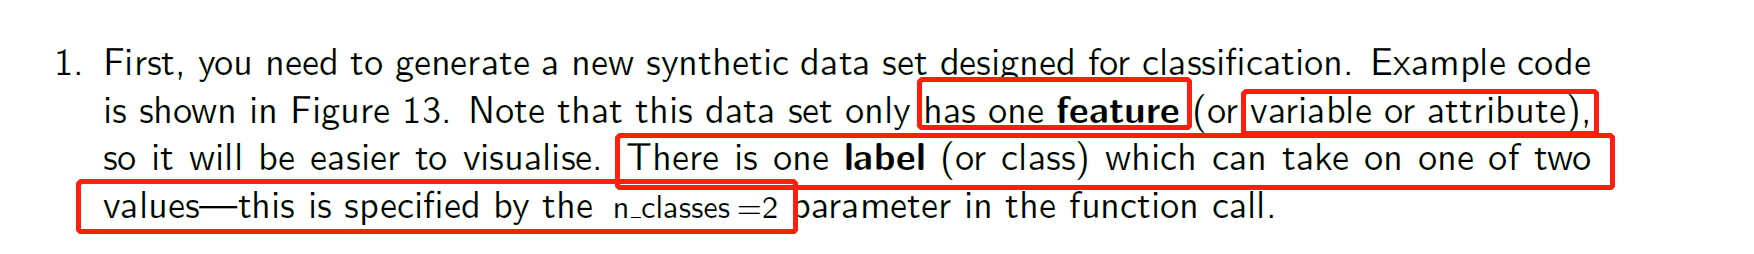

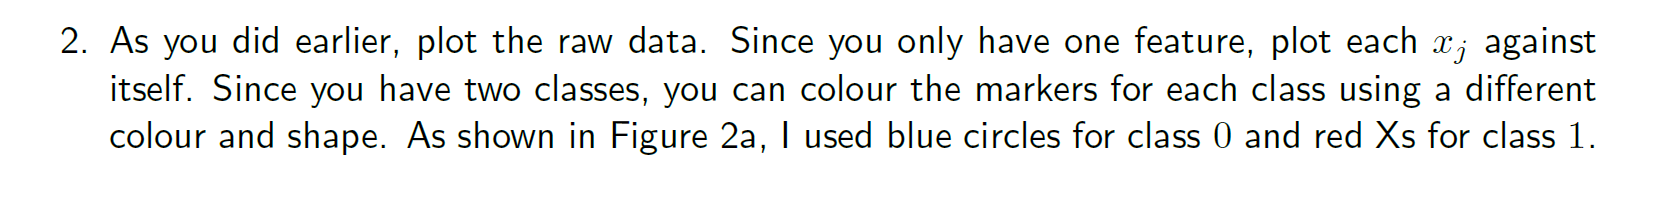

In [390]:
from sklearn import datasets
x,y = datasets.make_classification(n_features = 1,n_redundant=0,n_informative=1,n_classes=2,n_clusters_per_class=1,n_samples=100)
# x_train = np.array(x_train).reshape(1,-1).transpose()
# y_train = np.array(y_train)

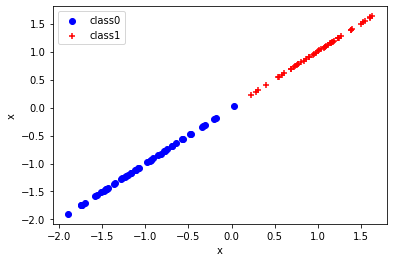

In [391]:
fig = plt.figure()
data_set=pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1,ignore_index=True)
data_set.rename(columns={0:'x',1:'y'},inplace=True)
plt.scatter(data_set[data_set['y']==0]['x'],data_set[data_set['y']==0]['x'],c='blue',marker='o',label='class0')
plt.scatter(data_set[data_set['y']==1]['x'],data_set[data_set['y']==1]['x'],c='red',marker='+',label='class1')
plt.xlabel('x')
plt.ylabel('x')
plt.legend(['class0','class1'])
plt.show()

In [392]:
# partition the data
x_train, x_test ,y_train, y_test = model_selection.train_test_split(data_set['x'],
                                                            data_set['y'],
                                                           test_size=0.10)

In [393]:
data_set['z'] ='train'
data_set.loc[data_set.loc[x_test.index].index,['z']] = 'test' 

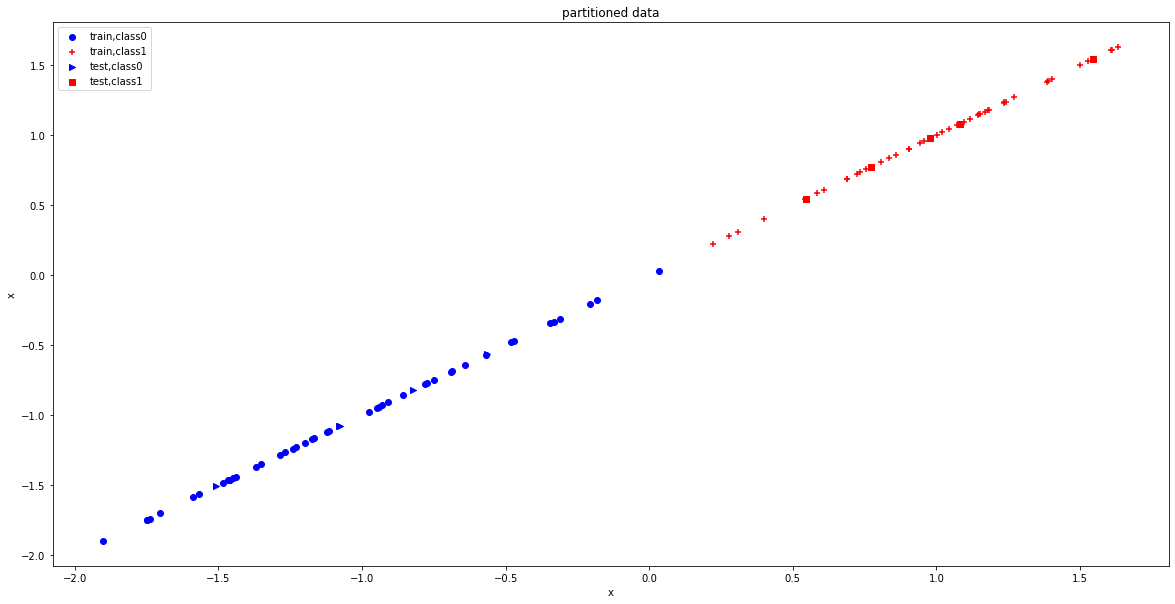

In [394]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],c='blue',marker='o',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],c='red',marker='+',label='train,class1')
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],c='blue',marker='>',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],c='red',marker='s',label='test,class1')

plt.xlabel('x')
plt.ylabel('x')
plt.legend(['train,class0','train,class1','test,class0','test,class1'])
plt.title('partitioned data')
plt.show()

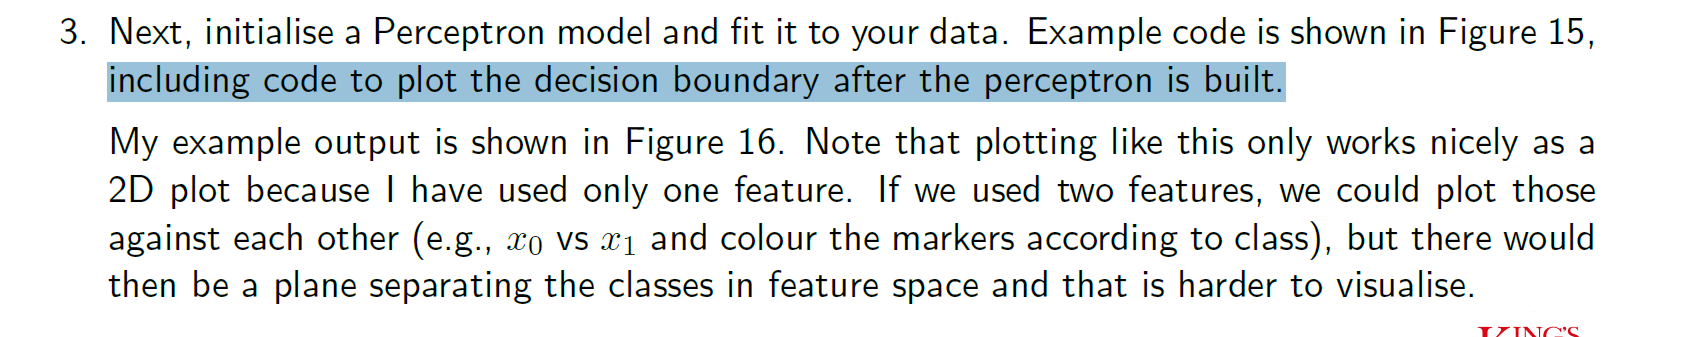

In [395]:
# initialize the perceptron model
per = linear_model.Perceptron()
x_train = np.array(x_train).reshape(1,-1).transpose()
y_train = np.array(y_train)
# build the model by adjusting the weights to fit the data
per.fit(x_train,y_train)
# predict the output using the model
y_hat = per.predict(x_train)
# plot the decision boundary 
######################################################################################################################################
#####################################################################################################################################
per.coef_[0][0]

3.102755287728442

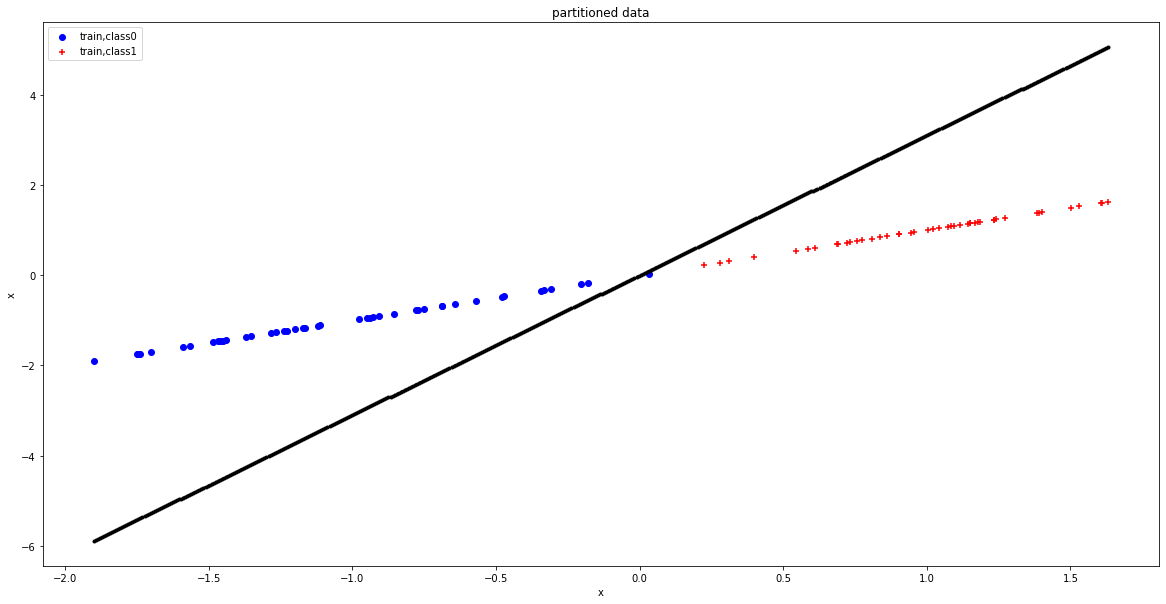

In [396]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],c='blue',marker='o',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],c='red',marker='+',label='train,class1')
plt.legend(['train,class0','train,class1'])

plt.xlabel('x')
plt.ylabel('x')

plt.plot(np.linspace(min(data_set['x']), max(data_set['x']), 500), per.coef_[0][0] * np.linspace(min(data_set['x']), max(data_set['x']), 500), c= "black", marker='.', linestyle=':')

plt.title('partitioned data')
plt.show()

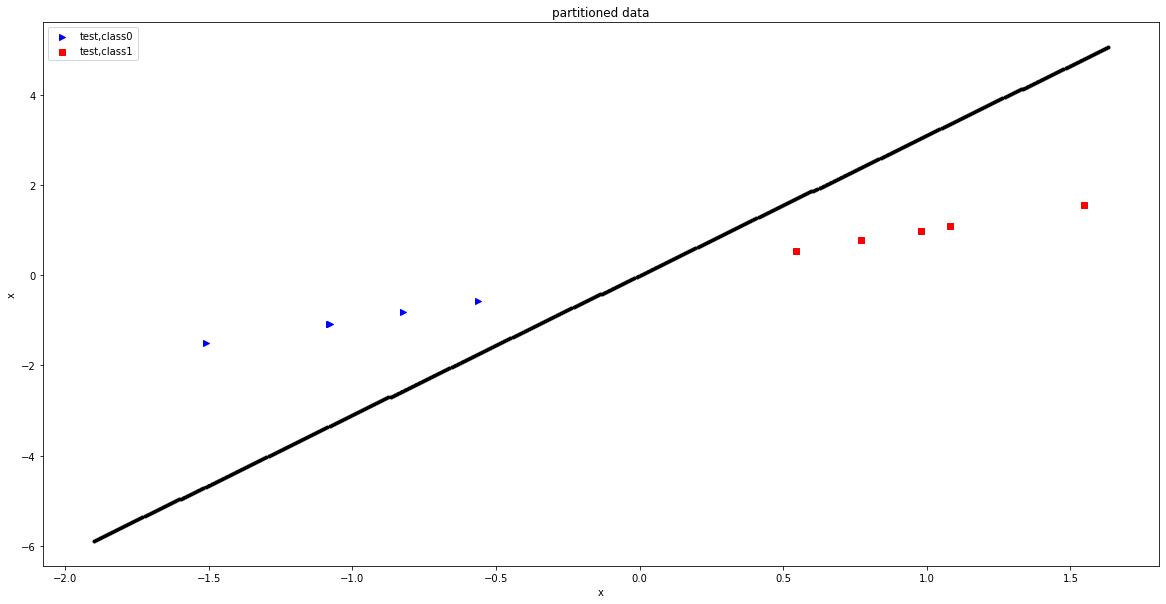

In [397]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],c='blue',marker='>',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],c='red',marker='s',label='test,class1')
plt.legend(['test,class0','test,class1'])
plt.plot(np.linspace(min(data_set['x']), max(data_set['x']), 500), per.coef_[0][0] * np.linspace(min(data_set['x']), max(data_set['x']), 500), c= "black", marker='.', linestyle=':')
plt.xlabel('x')
plt.ylabel('x')
plt.title('partitioned data')
plt.show()

In [398]:
from sklearn import metrics

In [399]:
print('accuracy = %f'%(metrics.accuracy_score(y_train,y_hat,normalize=True)))

accuracy = 0.988889


In [400]:
y_hat_test = per.predict(np.array(x_test).reshape(1,-1).transpose())
print('accuracy = %f'%(metrics.accuracy_score(np.array(y_test),y_hat_test,normalize=True)))

accuracy = 1.000000
